In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,7)
import numpy as np
from collections import Counter

colors = ["#fff600","#65def1","#f96900","#dc2e73","#5d00ff","#000c7d"]

all_files = glob.glob("daily/*.csv")
li = []

for filename in all_files:

    df = pd.read_csv(filename, index_col=None, header=0, skiprows = 1, parse_dates = ['date'])[['date', 'open', 'close',  'symbol']]
    df["yday"] = df.date.dt.dayofyear
    df["year"] = df.date.dt.year
    df["week"] = df.date.dt.week
    
    df.symbol = [i.split("/")[0] for i in df.symbol]
    df["change"] = (df.close - df.open) / df.open 
    df["changeint"] = [1 if i >= 0 else 0 for i in df.iloc[:, -1]]
    df = df.drop(['date'], axis = 1)
    
    df = df[::-1].reset_index(drop = True)
    
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

/var/folders/3n/qb9qrmdn45q_rjlp5x6g7k5c0000gn/T/ipykernel_14632/3572329042.py:18: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["week"] = df.date.dt.week


In [2]:
tickers = set(df.symbol)
tickers

{'ADA',
 'BNB',
 'BTC',
 'BTT',
 'DASH',
 'DOGE',
 'EOS',
 'ETC',
 'ETH',
 'LINK',
 'LTC',
 'NEO',
 'QTUM',
 'TRX',
 'XLM',
 'XMR',
 'XRP',
 'ZEC'}

In [3]:
def plot_points(ticker):
    print(ticker)
    temp = df[df.symbol == ticker]

    x = temp.yday
    years = set(temp.year)

    for y, c in zip(years, colors):
        current = temp[temp.year == y]
        plt.scatter(current.yday, current.change, color=c, label = str(y), s = 60, alpha = 0.8)

    plt.legend()
    plt.show()

def print_mostcommon_combination(ticker):
    temp = df[df.symbol == ticker]
    weekstrings = []
    for y in set(temp.year):
        curryear = temp[temp.year == y]
        for w in set(curryear.week):
            currweek = curryear[curryear.week == w]
            if currweek.shape[0] == 7:
                weekstrings.append("".join([str(i) for i in currweek.changeint.values]))

    comb, count =  Counter(weekstrings).most_common()[0]
    print(ticker+"     Combinations:"+comb+"   Count:"+str(count))

ADA


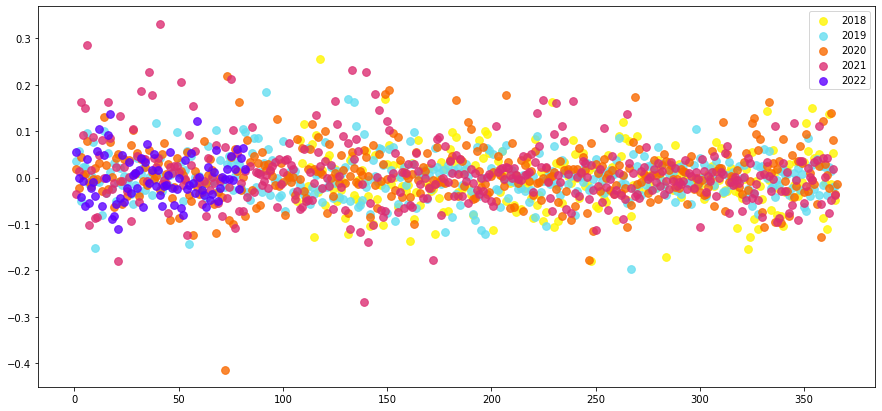

ADA     Combinations:0110011   Count:6


In [4]:
plot_points("ADA")
print_mostcommon_combination("ADA")

BNB


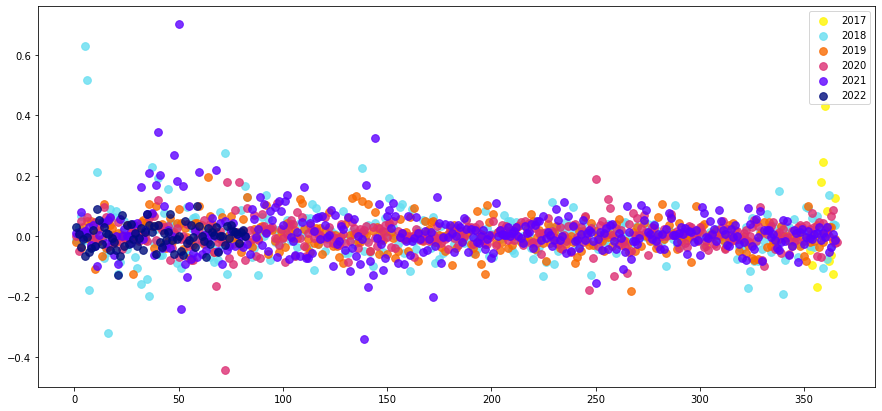

BNB     Combinations:0011110   Count:6


In [5]:
plot_points("BNB")
print_mostcommon_combination("BNB")

BTC


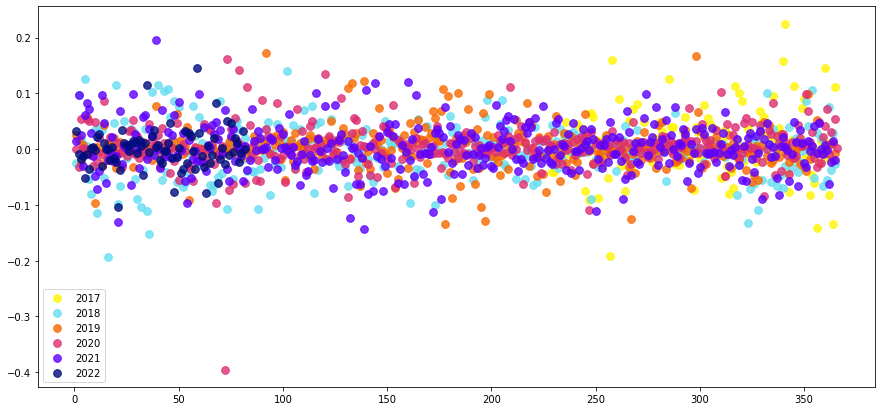

BTC     Combinations:1010110   Count:9


In [6]:
plot_points("BTC")
print_mostcommon_combination("BTC")

BTT


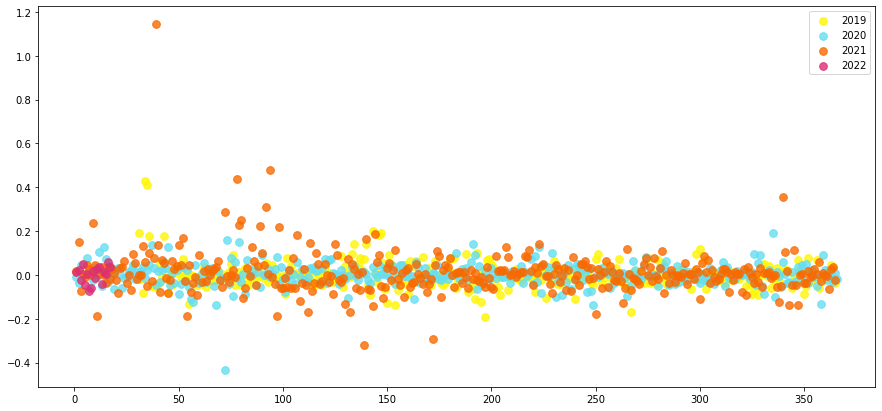

BTT     Combinations:0010110   Count:6


In [7]:
plot_points("BTT")
print_mostcommon_combination("BTT")

DASH


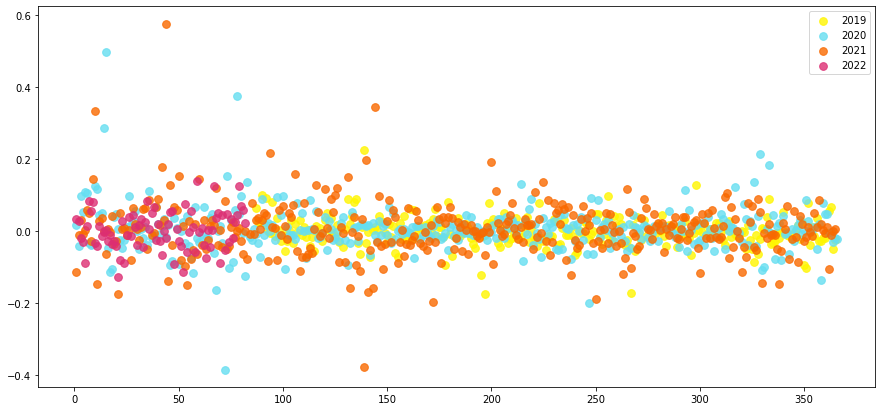

DASH     Combinations:1011010   Count:7


In [8]:
plot_points("DASH")
print_mostcommon_combination("DASH")

DOGE


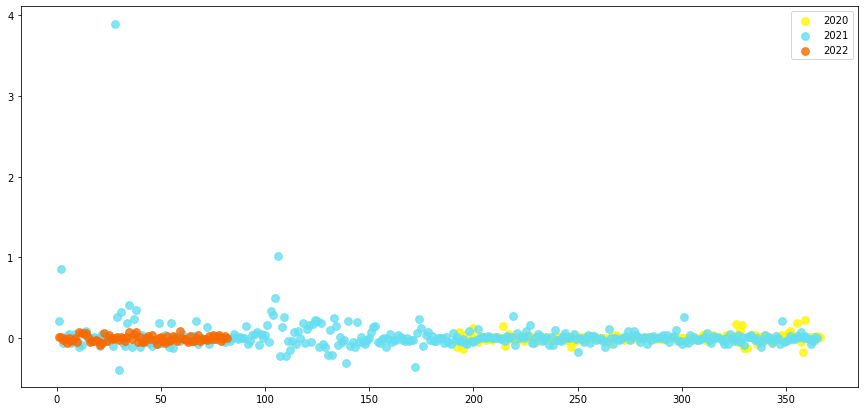

DOGE     Combinations:0100110   Count:4


In [9]:
plot_points("DOGE")
print_mostcommon_combination("DOGE")

EOS


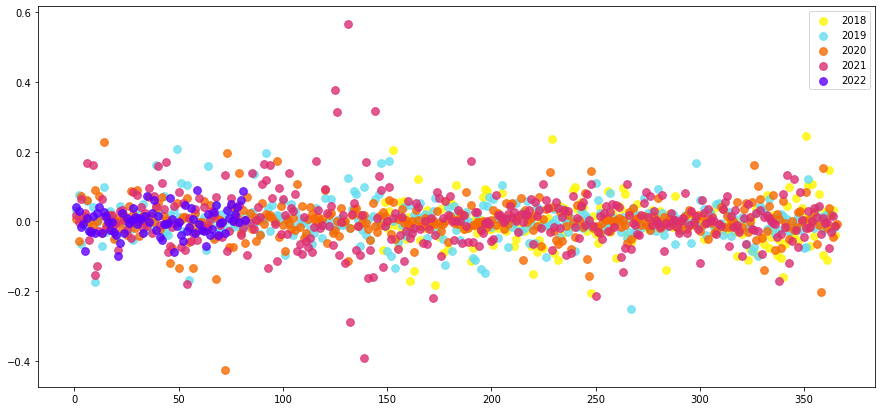

EOS     Combinations:0010101   Count:5


In [10]:
plot_points("EOS")
print_mostcommon_combination("EOS")

ETC


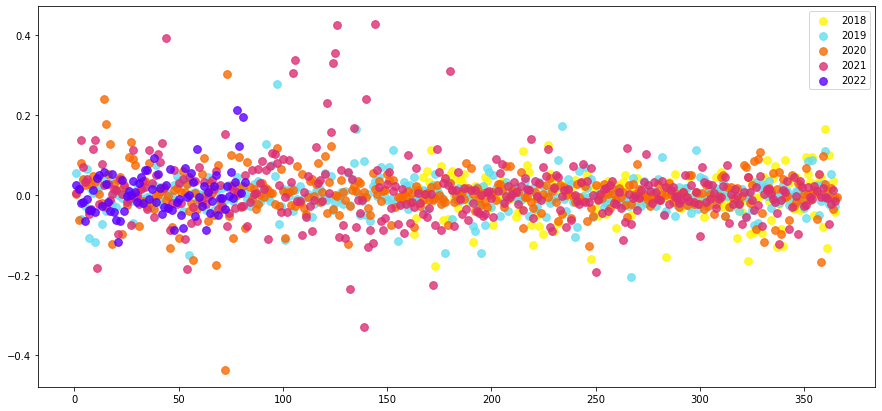

ETC     Combinations:1010011   Count:5


In [11]:
plot_points("ETC")
print_mostcommon_combination("ETC")

ETH


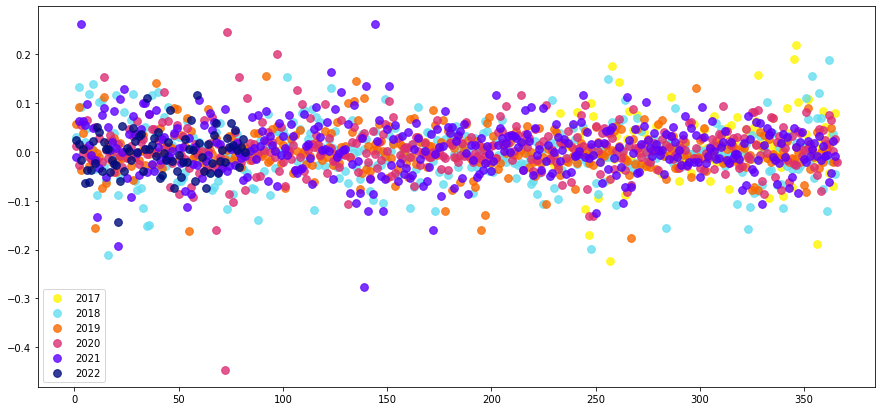

ETH     Combinations:1011110   Count:7


In [12]:
plot_points("ETH")
print_mostcommon_combination("ETH")

LINK


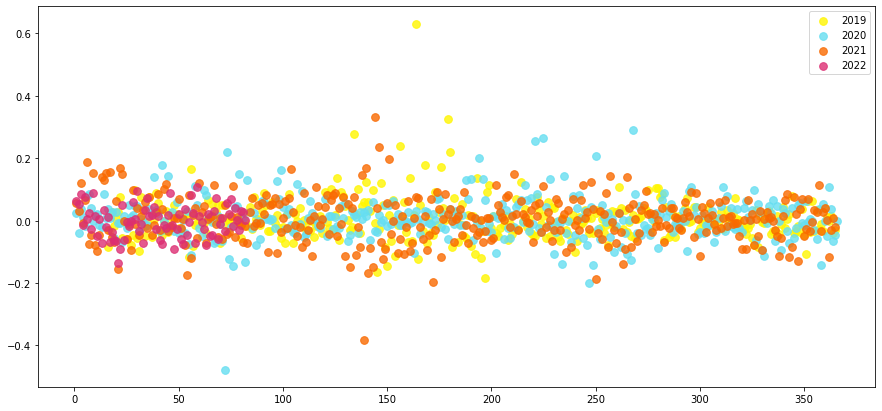

LINK     Combinations:0100101   Count:7


In [13]:
plot_points("LINK")
print_mostcommon_combination("LINK")

LTC


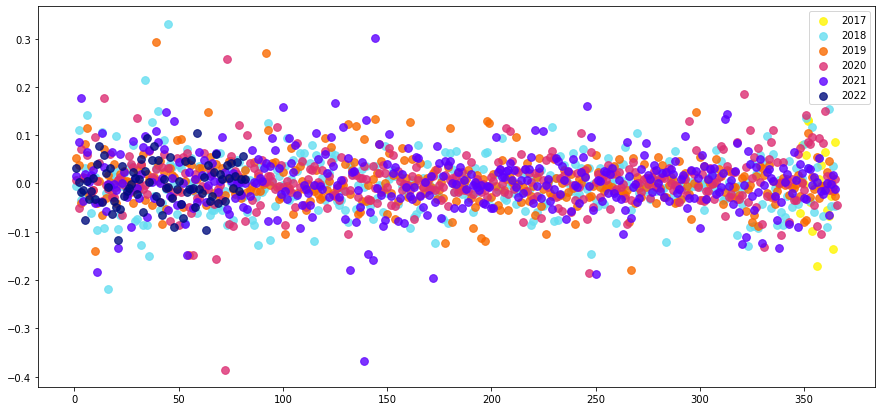

LTC     Combinations:0110110   Count:7


In [14]:
plot_points("LTC")
print_mostcommon_combination("LTC")

NEO


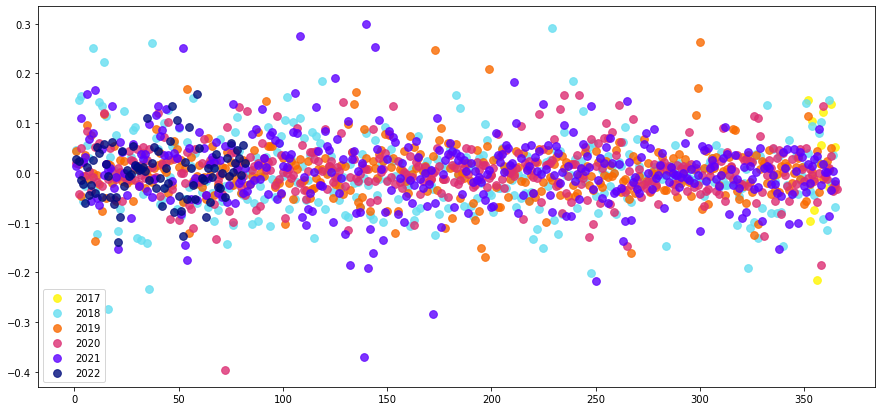

NEO     Combinations:0000001   Count:7


In [15]:
plot_points("NEO")
print_mostcommon_combination("NEO")

QTUM


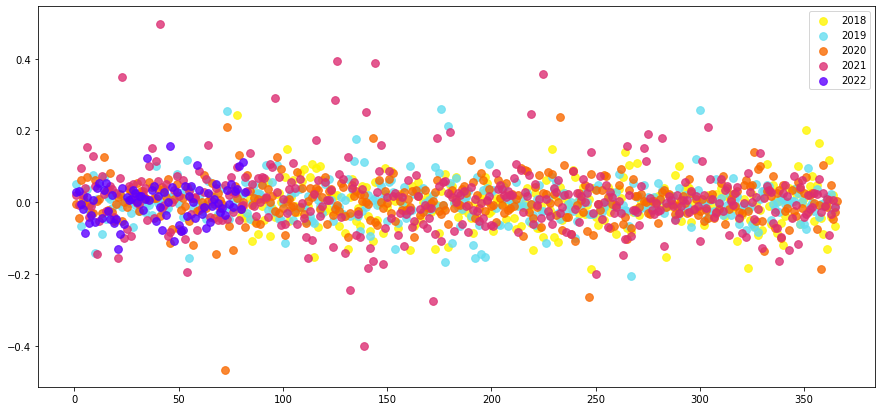

QTUM     Combinations:1010110   Count:7


In [16]:
plot_points("QTUM")
print_mostcommon_combination("QTUM")

TRX


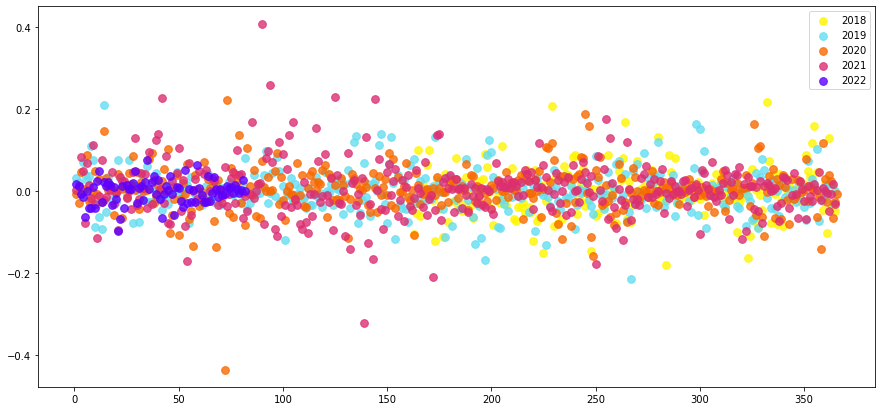

TRX     Combinations:1010111   Count:5


In [17]:
plot_points("TRX")
print_mostcommon_combination("TRX")

XLM


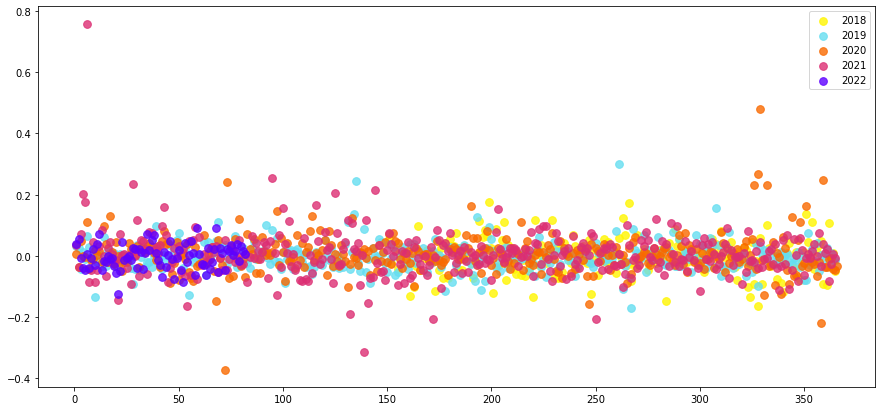

XLM     Combinations:1010111   Count:6


In [18]:
plot_points("XLM")
print_mostcommon_combination("XLM")

XMR


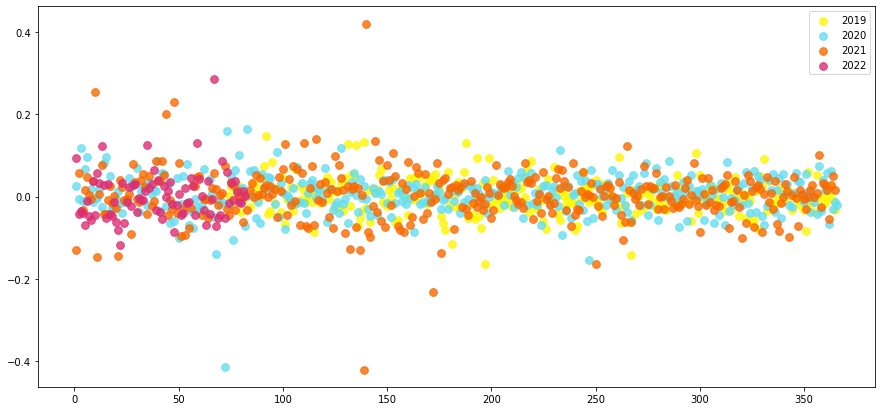

XMR     Combinations:1010110   Count:5


In [19]:
plot_points("XMR")
print_mostcommon_combination("XMR")

XRP


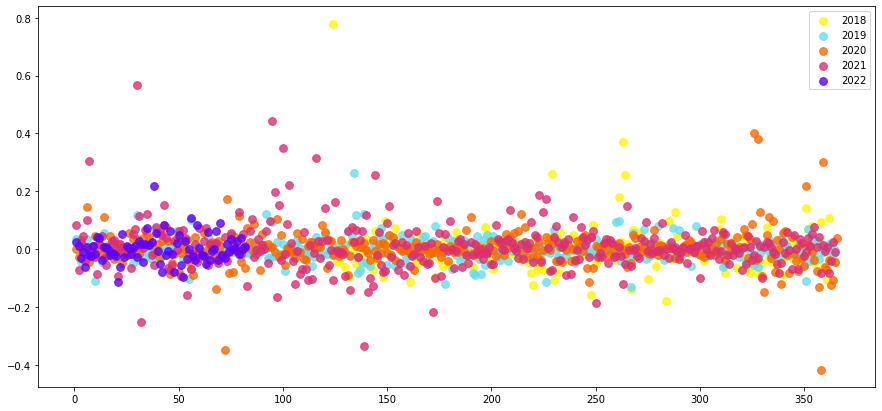

XRP     Combinations:1011010   Count:8


In [20]:
plot_points("XRP")
print_mostcommon_combination("XRP")

ZEC


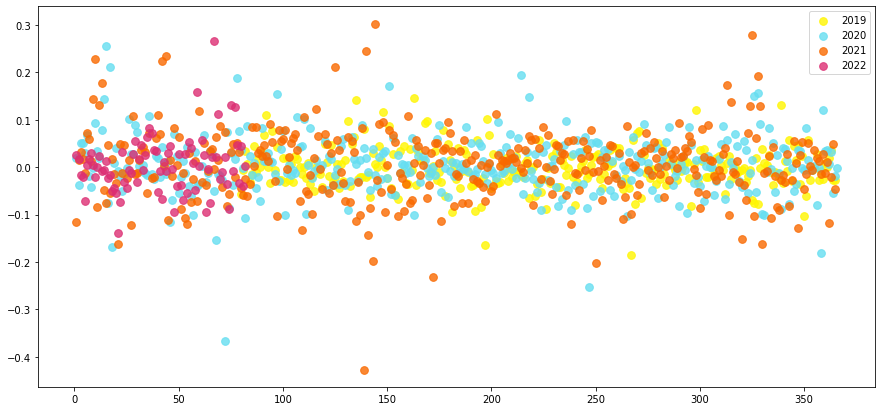

ZEC     Combinations:0001111   Count:6


In [21]:
plot_points("ZEC")
print_mostcommon_combination("ZEC")